# Project : Case Study (Part - II)

## Question- 1
```
Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR.
As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi.
Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times.
Plot the bar graph between location and number of funding.
Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.
```

In [1]:
# Importing required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading dataset & Creating a copy
data = pd.read_csv('./startup_funding.csv')
df = data.copy()
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [3]:
# Checking if there are Null values in CityLocation or not
df["CityLocation"].isnull().sum()

179

In [4]:
# Dropping rows with Null values in CityLocation
df["CityLocation"].dropna(inplace=True)

In [5]:
# Checking if there are Null values in CityLocation or not
df["CityLocation"].isnull().sum()

0

In [6]:
# Getting Indian cities from multiple cities
def separateCity(city):
    return city.split('/')[0].strip()
df['CityLocation']=df['CityLocation'].apply(separateCity)

# Rectifying mistyped "New Delhi" and "Bangalore" names as instructed in question
df['CityLocation'].replace("Delhi","New Delhi",inplace=True)
df['CityLocation'].replace("bangalore","Bangalore",inplace=True)

In [7]:
# Replacing Gurgaon, Noida and New Delhi with NCR
df['CityLocation'].replace(["Gurgaon", "Noida", "New Delhi"],"NCR",inplace=True)

In [8]:
# Dropping all rows except with required cities
for i in df.index:
    if (df['CityLocation'][i]!="Bangalore" and df['CityLocation'][i]!="Mumbai" and df['CityLocation'][i]!="NCR"):
        df.drop(i, inplace=True)

In [9]:
# Counting number of fundings in each city
city_counts = df['CityLocation'].value_counts()
city_counts

NCR          709
Bangalore    635
Mumbai       449
Name: CityLocation, dtype: int64

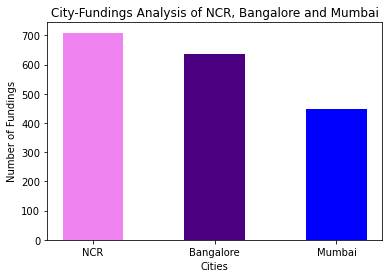

In [10]:
# Plotting Graph
plt.bar(height = city_counts, x = city_counts.index, color=["violet","indigo","blue"], width=0.5)
plt.xlabel('Cities')
plt.ylabel('Number of Fundings')
plt.title('City-Fundings Analysis of NCR, Bangalore and Mumbai')
plt.show()

# Answer- 1
The most number of funding is done in **NCR**, which is 709 Fundings

# Question- 2
```
Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors.
Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.
```

In [11]:
# Copying original data in df
df = data.copy()
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [12]:
# Checking if there are Null values in InvestorsName or not
df["InvestorsName"].isnull().sum()

8

In [13]:
# Dropping rows with Null values in InvestorsName
df["InvestorsName"].dropna(inplace=True)

In [14]:
# Checking if there are Null values in InvestorsName or not
df["InvestorsName"].isnull().sum()

0

In [15]:
# Creating dictionary of Investor names and Number of times invested
def createDictionary(array):
    dictionary={}
    for i in array:
        if ',' not in i:
            if i in dictionary:
                dictionary[i]=dictionary.get(i)+1
            else:
                dictionary[i]=1
        else:
            string=i.strip().split(',')
            for j in string:
                if j.strip() in dictionary:
                    dictionary[j.strip()]=dictionary.get(j.strip())+1
                else:
                    dictionary[j.strip()]=1
    return dictionary
dictionary=createDictionary(df['InvestorsName'])
dictionary

{'Kae Capital': 22,
 'Triton Investment Advisors': 1,
 'Kashyap Deorah': 3,
 'Anand Sankeshwar': 2,
 'Deepak Jain': 1,
 'Sadashiva NT': 1,
 'Arjun Mehta': 1,
 'Satish Kaul': 1,
 'Anindya Ghose': 1,
 'Kunal Shah': 17,
 'LetsVenture': 17,
 'Anupam Mittal': 18,
 'Hetal Sonpal': 1,
 'Narottam Thudi': 1,
 'Shireesh Palle': 1,
 'Reliance Corporate Advisory Services Ltd': 1,
 'Infuse Ventures': 8,
 'JLL': 2,
 'Asset Management (Asia) Ltd': 1,
 'Digital Garage Inc': 1,
 'Kalaari Capital': 44,
 'Nexus India Capital Advisors': 1,
 'International Finance Corporation': 2,
 'Rocketship': 2,
 'Accel Partners': 53,
 'Jungle Ventures': 13,
 'Shailesh Rao': 1,
 'Venture Highway': 3,
 'BCCL': 1,
 'Blume Ventures': 39,
 'Contrarian Capital India Partners': 1,
 'Emergent Ventures India': 1,
 'Pallav Nadhani': 4,
 'Ashish Gupta': 6,
 'Sharad Sharma': 4,
 'Sirion Labs': 1,
 'India Quotient': 21,
 'Shunwei Capital': 3,
 'Sreeram Iyer': 1,
 'Suvo Sarkar': 1,
 'Anita Gupta': 1,
 'Likemind Ventures': 1,
 'Mitsu

In [16]:
# Getting top investors in a dataframe
dataf=pd.DataFrame(list(dictionary.values()),list(dictionary.keys()))
dataf=dataf.sort_values(by=[0],ascending=False)
dataf=dataf[:6]
dataf

,0
Sequoia Capital,64
Accel Partners,53
Kalaari Capital,44
SAIF Partners,41
Indian Angel Network,40
Blume Ventures,39


In [17]:
# As there is no Tie, so we can drop the 6th investor
dataf.drop("Blume Ventures", inplace=True)

dataf

,0
Sequoia Capital,64
Accel Partners,53
Kalaari Capital,44
SAIF Partners,41
Indian Angel Network,40


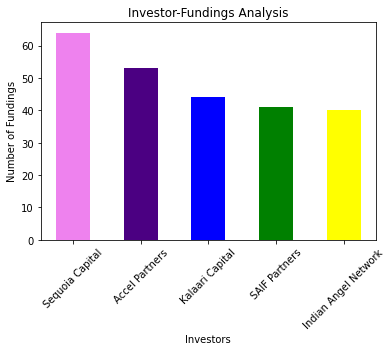

In [18]:
# Plotting Graph
plt.bar(height = dataf[0],x = dataf.index, color=["violet","indigo","blue","green","yellow"], width=0.5)
plt.xticks(rotation = 45)
plt.xlabel("Investors")
plt.ylabel('Number of Fundings')
plt.title('Investor-Fundings Analysis')
plt.show()

# Answer- 2
The top 5 investors who have invested maximum number of times are:
1. Sequoia Capital (64 investments)
2. Accel Partners (53 investments)
3. Kalaari Capital (44 investments)
4. SAIF Partners (41 investments)
5. Indian Angel Network (40 investments)

# Question- 3
```
After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup.
Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.
```

In [19]:
# df already dropped all Null values from InvestorsName, so we can continue with same

In [20]:
# # Checking if there are Null values in StartupName or not
df["StartupName"].isnull().sum()

0

In [21]:
# Handling errors in important Startup Names
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)

In [22]:
# Creating a dictionary with Keys as Investor Name & Values as Set of Startups in which the investor invested (to not repeat Startup names)

dictionary = {}
df.reset_index(drop=True, inplace=True)
for i in df.index:
    if ',' not in str(df['InvestorsName'][i]):
        if str(df['InvestorsName'][i]).strip() in dictionary:
            dictionary[str(df['InvestorsName'][i]).strip()].add(str(df['StartupName'][i]).strip())
        else:
            dictionary[str(df['InvestorsName'][i]).strip()] = {str(df['StartupName'][i]).strip()}
    else:
        string = str(df['InvestorsName'][i]).strip().split(',')
        for j in string:
                if j.strip() in dictionary:
                    dictionary[j.strip()].add(str(df['StartupName'][i]).strip())
                else:
                    dictionary[j.strip()]= {str(df['StartupName'][i]).strip()}
dictionary

{'Kae Capital': {'Azuro',
  'Daily Rounds',
  'Frsh',
  'Frsh.co.in',
  'Fynd',
  'HandyHome',
  'HealthKart',
  'Hypernova Interactive',
  'LearnTron',
  'ListUp',
  'Loantap',
  'Nudgespot',
  'Parentune',
  'Shopsense',
  'The Porter',
  'TouchKin',
  'Truebil',
  'TrulyMadly.com',
  'Trupay',
  'numberz.in'},
 'Triton Investment Advisors': {'Ethinos'},
 'Kashyap Deorah': {'Leverage Edu', 'Meesho', 'Springboard'},
 'Anand Sankeshwar': {'Leverage Edu', 'ShopsUp'},
 'Deepak Jain': {'Leverage Edu'},
 'Sadashiva NT': {'Leverage Edu'},
 'Arjun Mehta': {'Leverage Edu'},
 'Satish Kaul': {'Leverage Edu'},
 'Anindya Ghose': {'Leverage Edu'},
 'Kunal Shah': {'Bharat Bazaar',
  'Cookifi',
  'Daily Ninja',
  'Flyrobe',
  'Innov8',
  'Lets Reap',
  'LifCare',
  'ListUp',
  'Pianta',
  'Pocket Aces',
  'ShaadiSaga',
  'Spinny',
  'TableHero',
  'Twigly',
  'UnaAcademy',
  'Zepo',
  'enCashea'},
 'LetsVenture': {'Aisle',
  'Betaout',
  'BookEventz',
  'CollateBox',
  'FalconBrick',
  'Footprints E

In [23]:
# Replacing values of dictionary with corresponding length of set, to get count of different startups in which investor invested

for i in dictionary.keys():
    dictionary[i] = len(dictionary[i])
    
dictionary

{'Kae Capital': 20,
 'Triton Investment Advisors': 1,
 'Kashyap Deorah': 3,
 'Anand Sankeshwar': 2,
 'Deepak Jain': 1,
 'Sadashiva NT': 1,
 'Arjun Mehta': 1,
 'Satish Kaul': 1,
 'Anindya Ghose': 1,
 'Kunal Shah': 17,
 'LetsVenture': 17,
 'Anupam Mittal': 18,
 'Hetal Sonpal': 1,
 'Narottam Thudi': 1,
 'Shireesh Palle': 1,
 'Reliance Corporate Advisory Services Ltd': 1,
 'Infuse Ventures': 8,
 'JLL': 2,
 'Asset Management (Asia) Ltd': 1,
 'Digital Garage Inc': 1,
 'Kalaari Capital': 41,
 'Nexus India Capital Advisors': 1,
 'International Finance Corporation': 2,
 'Rocketship': 2,
 'Accel Partners': 47,
 'Jungle Ventures': 11,
 'Shailesh Rao': 1,
 'Venture Highway': 3,
 'BCCL': 1,
 'Blume Ventures': 36,
 'Contrarian Capital India Partners': 1,
 'Emergent Ventures India': 1,
 'Pallav Nadhani': 4,
 'Ashish Gupta': 5,
 'Sharad Sharma': 4,
 'Sirion Labs': 1,
 'nan': 8,
 'India Quotient': 18,
 'Shunwei Capital': 3,
 'Sreeram Iyer': 1,
 'Suvo Sarkar': 1,
 'Anita Gupta': 1,
 'Likemind Ventures':

In [24]:
# Getting top investors in a dataframe
dataf=pd.DataFrame(list(dictionary.values()),list(dictionary.keys()))
dataf=dataf.sort_values(by=[0],ascending=False)
dataf=dataf[:6]
dataf

,0
Sequoia Capital,48
Accel Partners,47
Kalaari Capital,41
Indian Angel Network,40
,38
Blume Ventures,36


In [25]:
# Dropping irrelevant entry from dataf
dataf.drop("", inplace=True)
dataf

,0
Sequoia Capital,48
Accel Partners,47
Kalaari Capital,41
Indian Angel Network,40
Blume Ventures,36


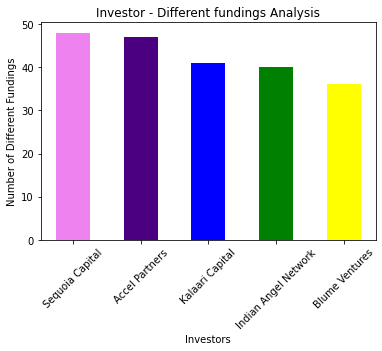

In [26]:
# Plotting Graph
plt.bar(height = dataf[0],x = dataf.index, color=["violet","indigo","blue","green","yellow"], width=0.5)
plt.xticks(rotation = 45)
plt.xlabel("Investors")
plt.ylabel('Number of Different Fundings')
plt.title('Investor - Different fundings Analysis')
plt.show()

# Answer- 3
The top 5 investors who have invested maximum number of times in different companies are:
1. Sequoia Capital (48 investments)
2. Accel Partners (47 investments)
3. Kalaari Capital (41 investments)
4. Indian Angel Network (40 investments)
5. Blume Ventures (36 investments)

## Ques- 4
```
Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding.
Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding.
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.
```

In [27]:
# df already dropped all Null values from InvestorsName & corrected Startup names, so we can continue with same

In [28]:
# Correcting the InvestmentType
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)

In [29]:
# Dropping rows in which InvestmentType is neither Crowd Funding nor Seed Funding
for i in df.index:
    if df['InvestmentType'][i] != "Crowd Funding" and df['InvestmentType'][i] != "Seed Funding":
        df.drop(i, inplace=True)
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN
11,11,06/07/2017,Minjar,Technology,Cloud Solutions provider,Bangalore,"Blume Ventures, Contrarian Capital India Partn...",Seed Funding,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2356,2356,21/05/2015,Villgro,NaN,NaN,NaN,Michael & Susan Dell Foundation,Seed Funding,"3,250,000",To fund edu startups
2357,2357,22/01//2015,Corporate360,NaN,NaN,NaN,Group of Angel Investors,Seed Funding,"200,000",NaN
2358,2358,22/01/2015,Freshmonk,NaN,NaN,NaN,"August Capital Partners, Michael Blakey",Seed Funding,NaN,NaN
2362,2362,24/01/2015,Aasaanjobs,NaN,NaN,NaN,"Inventus Capital Partners, IDG Ventures",Seed Funding,"1,500,000",NaN


In [30]:
# Creating a dictionary with Keys as Investor Name & Values as Set of Startups in which the investor invested (to not repeat Startup names)

dictionary = {}
df.reset_index(drop=True, inplace=True)
for i in df.index:
    if ',' not in str(df['InvestorsName'][i]):
        if str(df['InvestorsName'][i]).strip() in dictionary:
            dictionary[str(df['InvestorsName'][i]).strip()].add(str(df['StartupName'][i]).strip())
        else:
            dictionary[str(df['InvestorsName'][i]).strip()] = {str(df['StartupName'][i]).strip()}
    else:
        string = str(df['InvestorsName'][i]).strip().split(',')
        for j in string:
                if j.strip() in dictionary:
                    dictionary[j.strip()].add(str(df['StartupName'][i]).strip())
                else:
                    dictionary[j.strip()]= {str(df['StartupName'][i]).strip()}
dictionary

{'Kashyap Deorah': {'Leverage Edu', 'Meesho', 'Springboard'},
 'Anand Sankeshwar': {'Leverage Edu', 'ShopsUp'},
 'Deepak Jain': {'Leverage Edu'},
 'Sadashiva NT': {'Leverage Edu'},
 'Arjun Mehta': {'Leverage Edu'},
 'Satish Kaul': {'Leverage Edu'},
 'Anindya Ghose': {'Leverage Edu'},
 'Kunal Shah': {'Bharat Bazaar',
  'Cookifi',
  'Daily Ninja',
  'Flyrobe',
  'Innov8',
  'Lets Reap',
  'LifCare',
  'ListUp',
  'Pianta',
  'ShaadiSaga',
  'TableHero',
  'Twigly',
  'Zepo',
  'enCashea'},
 'LetsVenture': {'Aisle',
  'BookEventz',
  'CollateBox',
  'FalconBrick',
  'Footprints Education',
  'Gridle',
  'JustLikeNew',
  'Ketto',
  'LetsMD',
  'Massblurb',
  'MyGreens',
  'Netree',
  'Nightstay',
  'OnlineRTI',
  'SavvyMob',
  'Zepo'},
 'Anupam Mittal': {'Blinge',
  'CareonGO',
  'Daily Ninja',
  'HashLearn',
  'InstaLively.com',
  'LetsMD',
  'Near.in',
  'ShaadiSaga',
  'Splitkart',
  'Truce',
  'Truebil',
  'Vebbler',
  'WitWorks',
  'Yumlane',
  'Zepo',
  'infeedo'},
 'Hetal Sonpal': {

In [31]:
# Replacing values of dictionary with corresponding length of set, to get count of different startups in which investor invested

for i in dictionary.keys():
    dictionary[i] = len(dictionary[i])
    
dictionary

{'Kashyap Deorah': 3,
 'Anand Sankeshwar': 2,
 'Deepak Jain': 1,
 'Sadashiva NT': 1,
 'Arjun Mehta': 1,
 'Satish Kaul': 1,
 'Anindya Ghose': 1,
 'Kunal Shah': 14,
 'LetsVenture': 16,
 'Anupam Mittal': 16,
 'Hetal Sonpal': 1,
 'Narottam Thudi': 1,
 'Shireesh Palle': 1,
 'Reliance Corporate Advisory Services Ltd': 1,
 'Blume Ventures': 10,
 'Contrarian Capital India Partners': 1,
 'Emergent Ventures India': 1,
 'Pallav Nadhani': 3,
 'Ashish Gupta': 5,
 'Sharad Sharma': 4,
 'Sirion Labs': 1,
 'nan': 7,
 'India Quotient': 10,
 'Shunwei Capital': 1,
 'Sreeram Iyer': 1,
 'Suvo Sarkar': 1,
 'Anita Gupta': 1,
 'Likemind Ventures': 1,
 'Venture Catalysts': 5,
 'Sourav Ganguly': 1,
 'Ankit Aditya': 1,
 'Moksh Sports Ventures': 1,
 'Fireside Ventures': 4,
 'Apurva Salarpuria': 1,
 'Sidharth Pansari': 2,
 'Sprout Capital': 1,
 '500 Startups': 11,
 'Purvi Capital': 2,
 'Rajan Anandan': 23,
 'Abhishek Gupta': 1,
 'Indian Angel Network': 33,
 'Brigade Innovations LLP': 1,
 'TV Mohandas Pai': 10,
 'Su

In [32]:
# Getting top investors in a dataframe
dataf=pd.DataFrame(list(dictionary.values()),list(dictionary.keys()))
dataf=dataf.sort_values(by=[0],ascending=False)
dataf=dataf[:12]
dataf

,0
Indian Angel Network,33
Undisclosed Investors,27
Undisclosed investors,24
Rajan Anandan,23
,22
LetsVenture,16
Anupam Mittal,16
Group of Angel Investors,14
Kunal Shah,14
Kae Capital,12


In [33]:
# Dropping irrelevant entry from dataf
dataf.drop("Undisclosed Investors", inplace=True)
dataf.drop("Undisclosed investors", inplace=True)
dataf.drop("", inplace=True)
dataf.drop("Singapore Angel Network", inplace=True)
dataf

,0
Indian Angel Network,33
Rajan Anandan,23
LetsVenture,16
Anupam Mittal,16
Group of Angel Investors,14
Kunal Shah,14
Kae Capital,12
ah! Ventures,12


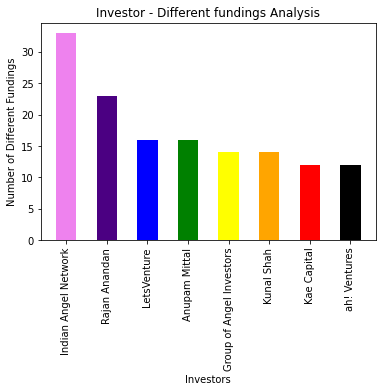

In [34]:
# Plotting Graph
plt.bar(height = dataf[0],x = dataf.index, color=["violet","indigo","blue","green","yellow","orange","red","black"], width=0.5)
plt.xticks(rotation = 90)
plt.xlabel("Investors")
plt.ylabel('Number of Different Fundings')
plt.title('Investor - Different fundings Analysis')
plt.show()

# Answer- 4
The top 5 investors who have invested maximum number of times in different companies are:
1. Indian Angel Network (33 investments)
2. Rajan Anandan (23 investments)
3. LetsVenture (16 investments)
3. Anupam Mittal (16 investments)
4. Group of Angel Investors (14 investments)
4. Kunal Shah (14 investments)
5. Kae Capital (12 investments)
5. ah! Ventures (12 investments)

## Question- 5
```
Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity.
Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity.
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.
```

In [35]:
# Copying original data in df
df = data.copy()
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [36]:
# Rectifying mistyped required Investment Type
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)

# Dropping rows in which InvestmentType is not Private Equity
for i in df.index:
    if df['InvestmentType'][i] != "Private Equity":
        df.drop(i, inplace=True)
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
6,6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000",NaN
7,7,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,"20,000,000",NaN
8,8,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"8,500,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2366,2366,28/01/2015,Grabhouse.com,NaN,NaN,NaN,"Kalaari Capital, Sequoia Capital",Private Equity,"2,500,000",Series A
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN


In [37]:
# Checking if there are Null values in StartupName or not
df["StartupName"].isnull().sum()

0

In [38]:
# Checking if there are Null values in InvestorsName or not
df["InvestorsName"].isnull().sum()

1

In [39]:
# Dropping rows with Null values in InvestorsName
df["InvestorsName"].dropna(inplace=True)

In [40]:
# Checking if there are Null values in InvestorsName or not
df["InvestorsName"].isnull().sum()

0

In [41]:
# Handling errors in important Startup Names
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)

In [42]:
# Creating a dictionary with Keys as Investor Name & Values as Set of Startups in which the investor invested (to not repeat Startup names)

dictionary = {}
df.reset_index(drop=True, inplace=True)
for i in df.index:
    if ',' not in str(df['InvestorsName'][i]):
        if str(df['InvestorsName'][i]).strip() in dictionary:
            dictionary[str(df['InvestorsName'][i]).strip()].add(str(df['StartupName'][i]).strip())
        else:
            dictionary[str(df['InvestorsName'][i]).strip()] = {str(df['StartupName'][i]).strip()}
    else:
        string = str(df['InvestorsName'][i]).strip().split(',')
        for j in string:
                if j.strip() in dictionary:
                    dictionary[j.strip()].add(str(df['StartupName'][i]).strip())
                else:
                    dictionary[j.strip()]= {str(df['StartupName'][i]).strip()}
dictionary

{'Kae Capital': {'Azuro',
  'Frsh',
  'Fynd',
  'HealthKart',
  'Loantap',
  'Parentune',
  'The Porter',
  'TouchKin',
  'Truebil',
  'TrulyMadly.com'},
 'Triton Investment Advisors': {'Ethinos'},
 'Infuse Ventures': {'Ecolibriumenergy',
  'Fourth Partner Energy',
  'GIBSS',
  'Karma Recycling',
  'Proviera',
  'Silvan Innovation Labs'},
 'JLL': {'Ecolibriumenergy'},
 'Asset Management (Asia) Ltd': {'Droom'},
 'Digital Garage Inc': {'Droom'},
 'Kalaari Capital': {'Active.ai',
  'Affordplan',
  'Airpay',
  'AppDaily',
  'AppsDaily',
  'Appsdaily',
  'Bestdealfinance',
  'BlueStone',
  'Casa2inns',
  'Cashkaro.com',
  'CreditVidya',
  'Crowdfire (formerly Justunfollow)',
  'Curefit',
  'Doormint',
  'Eatfresh',
  'ElastiRun',
  'ElasticRun',
  'Grabhouse.com',
  'HolaChef',
  'Holachef',
  'IndustryBuying',
  'Jumbotail',
  'POPxo.com',
  'RKSV',
  'Robosoft',
  'Rubique',
  'ScoopWhoop',
  'Shopalyst',
  'Simplilearn',
  'Stalk Buy Love',
  'Triphobo',
  'Truebil',
  'Truweight',
  'Un

In [43]:
# Replacing values of dictionary with corresponding length of set, to get count of different startups in which investor invested

for i in dictionary.keys():
    dictionary[i] = len(dictionary[i])
    
dictionary

{'Kae Capital': 10,
 'Triton Investment Advisors': 1,
 'Infuse Ventures': 6,
 'JLL': 1,
 'Asset Management (Asia) Ltd': 1,
 'Digital Garage Inc': 1,
 'Kalaari Capital': 35,
 'Nexus India Capital Advisors': 1,
 'International Finance Corporation': 2,
 'Rocketship': 2,
 'Accel Partners': 43,
 'Jungle Ventures': 8,
 'Shailesh Rao': 1,
 'Venture Highway': 2,
 'BCCL': 1,
 'Mitsui & Co.': 2,
 'Dunamis Ventures Pte Ltd': 1,
 'SBI-FMO Fund': 1,
 'Bessemer Venture Partners': 11,
 'Catamaran Ventures': 2,
 'Corvus Ventures': 1,
 'MAPE Advisory Group': 1,
 'Blacksoil Capital Pvt. Ltd': 1,
 'IDG Ventures India Advisors': 1,
 'One97 Communication Ltd': 1,
 'ain Capital Ventures': 1,
 'Renaud Laplanche': 1,
 'Stellaris Venture Partners': 3,
 '': 16,
 'Tencent Holdings': 3,
 'Goldman Sachs': 6,
 'HBM Healthcare Investments': 1,
 'Maverick Capital Ventures': 1,
 'Sequoia India': 14,
 'Omidyar Network and Kae Capital': 1,
 'Info Edge (India) Ltd': 6,
 'TVS Motor Company': 1,
 'Emerging India': 1,
 'blo

In [44]:
# Creating a dataframe of top investors
dataf=pd.DataFrame(list(dictionary.values()),list(dictionary.keys()))
dataf=dataf.sort_values(by=[0],ascending=False)
dataf=dataf[:6]
dataf

,0
Sequoia Capital,45
Accel Partners,43
Kalaari Capital,35
Blume Ventures,27
SAIF Partners,24
Tiger Global,22


In [45]:
# As there is no Tie, so we can drop the 6th investor
dataf.drop("Tiger Global", inplace=True)

dataf

,0
Sequoia Capital,45
Accel Partners,43
Kalaari Capital,35
Blume Ventures,27
SAIF Partners,24


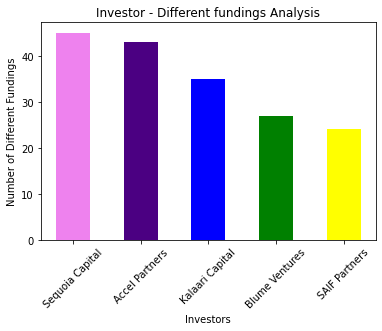

In [46]:
# Plotting Graph
plt.bar(height = dataf[0],x = dataf.index, color=["violet","indigo","blue","green","yellow"], width=0.5)
plt.xticks(rotation = 45)
plt.xlabel("Investors")
plt.ylabel('Number of Different Fundings')
plt.title('Investor - Different fundings Analysis')
plt.show()

# Answer- 5
The top 5 investors who have invested in a different number of startups and their investment type is Private Equity are:
1. Sequoia Capital (45 investments)
2. Accel Partners (43 investments)
3. Kalaari Capital (35 investments)
4. Blume Ventures (27 investments)
5. SAIF Partners (24 investments)